# Algorithms in Computational Biology | Diego Serra
# Assignment 2: Shortest Common Superstring

## Question 1: Write SSS function

The main task we are asked is to write a function SSS that takes a list of subsequences and returns the shortest common superstring of all the input strings using DP.  
In the book, we have seen that a greedy algorithm could give perhaps not the best but an efficient algorithm.  
The basic principle of the algorithm lays on the idea that we look for the best binary combination, then we take  
the shortest superstring containing the pair of strings and finally we recompute all combination with this new string.

Therefore, my work will be divided in 4 main steps: 

    1) Create a function that will find the shortest common superstring for two strings.

    2) Create a function that will store all the combinantion between the subsequences.

    3) Create a function that will select the best possible combinatin (basis of the GREEDY algorithm).

    4) Finally create the SSS function that will returns the shortest common superstring for a list of subsequences.

### First Step: Shortest Superstring between two strings 

In [9]:
def ShortestSuperstring (s1, s2, memory = {}): 
    """ This function uses recursion to return the shortest superstring between s1 and s2.
        ::param:: s1, s2 are strings (e.g., DNA).
        ::output:: Shortest common superstring.
    """
    
    if (s1,s2) in memory: # Dynamic programming
        return memory[(s1,s2)] 
    
    if (s2, s1) in memory: 
        return memory[(s2,s1)]
           
    
    if s1 == "": # Base call for recursion
        return s2
    
    elif s2 == "": 
        return s1
    
    else: 
        
        if s1[0] == s2[0]:
            memory[(s1,s2)] = s1[0] + ShortestSuperstring(s1[1::], s2[1::], memory)
            return memory[(s1,s2)]
        
        else: 
            memory[(s1,s2)] = min((s1[0] + ShortestSuperstring(s1[1::], s2)), (s2[0] + ShortestSuperstring(s1, s2[1::])), key= len)
            return memory[(s1,s2)]

### Second Step: Storing all the combination

In [29]:
def SSSHelper(subsequences, dico = {}): 
    """ This function is used to store all the combination in a dictionnary. data are arranged as {(s1,s2): shortest_s1_s2}.
        ::param:: subsequences is a list of sequences (e.g., DNA)
        ::param:: dico is the cache of the function.
    """
    for i in range(len(subsequences)):   
        
        for j in range(i+1, len(subsequences)):
            
            if subsequences[i] != subsequences[j]: # Or create a function that will remove duplicate in the list CHOICE
        
                if (subsequences[i], subsequences[j]) and (subsequences[j], subsequences[i]) not in dico: 
                    
                    dico[(subsequences[i], subsequences[j])] = ShortestSuperstring(subsequences[i], subsequences[j])
                   
    return dico

### Third step: Find the best combination

The trick here to find the best combination is to find the combination in which the difference between the two concatenated string (i.e., the sum of their length) and the length of their superstring is the highest possible. This means that compared to their parent strings, the superstring is the shortest possible. 

In [31]:
def BestSuperString(dico):
    """ This function is used to find the best superstring (i.e., the one that is the shortest comparing the concatenation
        of its parent strings).
        ::param:: dico is a dictionnary that stores every possible combianation and their superstring.
        ::output:: return the best superstring and its parent strings.
    """
    
    best_string = ''
    strings = []
    maxscore = 0
    
    for el in dico: 
        
        if len(el[0]) + len(el[1]) - len(dico[el]) > maxscore: 
            best_string = dico[el]
            strings = [el[0], el[1]]
            maxscore = len(el[0]) + len(el[1]) - len(dico[el])
        
    
    return best_string, strings

### Fourth step: SSS function

In [159]:
def clear_duplicates(subsequences):
    """ This function could be usefull if we decide to remove duplicates from the initial list (i.e., we do not consider duplicates as
        different sequences).
        ::param:: list of subsequences.
        ::output:: list of subsequences without duplicates.
    """
    
    cache = {}
    
    for el in subsequences:
        if el not in cache:
            cache[el] = ""
    
    return list(cache.keys()) 
        
        

In [50]:
def any_in(i,j):
    """ This function is used to check if any element in i is found in j.
    """
    
    for el in i:
        if el in j: 
            return True
    return False

In [140]:
def SSS(subsequences): 
    """ The function takes a list of sequences and returns the shortest common superstring among all the combination.
        ::output:: the shortest common superstring.
    """
    dico = SSSHelper(subsequences, dico = {}) # First generation of the combinations
    best_string = '' # Fix the error of referenced before assignement for plotting
    while len(subsequences)> 1: # When a last superstring is left
        
        best_string, strings = BestSuperString(dico)
        subsequences.remove(strings[0])
        subsequences.remove(strings[1])
        subsequences.append(best_string)
        
        element_to_delete = [key for key in dico if any_in(strings, key)]
        for k in element_to_delete: del dico[k] # Remove everything that has been already calculated
        
        dico = SSSHelper(subsequences, dico)
    
    return best_string

## Question 2: What is the runtime of SSS function

The runtime of the SSS function can be deduced as following :  

| Function            | Time Complexity | Justification|
| :-------------------|:---------------:|:---------------:|
| ShortestSuperstring |  $O(n)$         | The function will recurse until the length n of 1 string is reached. |
| SSShelper           | $O(k^2 n)$      | The function will loop 2 times over the length of the sequence list k,  times the ShortestSuperString.|  
| BestSuperstring     | $O(s)$           | The function will loop through the length s of the dictionnary.|
| SSS                 | $O(?)$           | The function will loop k-1 times, removing el from a list takes k times, appending takes $O(1)$, the first for loop takes $O(s)$, the second for loop will depend on the element to delete wich are the binary combination containing one of the strings which is $C^n_k$ + $C^n_k$ - $C^n_{k-2}$ - 1 (duplicate combination of the two strings).

In [97]:
import timeit
import matplotlib.pyplot as plt
import time
import random

In [160]:
def randSubstring(S,k):
    """ This function is used to generate a random substring of length k from an original string S. The idea is to generate
        random number which will be sorted and given as position to take the letter from the original string.
        ::param:: S is the orignal string.
        ::param:: k is the length of the substring.
        ::output:: a random substring of the original string S.
    """
    sequence = []
    substring = ""
    
    while len(sequence) != k:
        a =random.randint(0, len(S)-1)        
        if a not in sequence:
            sequence.append(a)        
    sequence.sort()
    
    for el in sequence: 
        substring += S[el]
    return substring

In [135]:
def plotruntimeNfixed(f,n, k, trials, figsize = [5,5]):
    """
    The function plots de runtime for the folding function.
    ::param:: f is the function used in the statement of the timeit function.
    ::param:: x is the desired parameter to check (samplelen, samples number, originalstring len). 
    ::param:: maxvalue is the maximum desired value to test (e.g., sample length, original string length, number of samples)
    ::param:: trials is the number of time the function will be called for a parameter value. The value will be averaged.
    ::figsize:: figsize is desired plot size.
    """
    
    times=[]
    originalstring_length=[]
    samples_number = []
           
    S="".join(random.choice("atgc") for i in range(40))
        
    for i in range(1, k):
        T = [randSubstring(S, n) for i in range(i)]
        time = timeit.timeit(stmt= lambda:f(T), number=trials)/trials
        times.append(time)
        samples_number.append(i)
    

    fig,ax = plt.subplots(figsize= figsize)
    ax.set_ylabel("Runtime [s]")
    ax.plot(samples_number, times, 'g')
    ax.set_xlabel("Samples number")
    plt.title('Runtime in function of the sample number.')

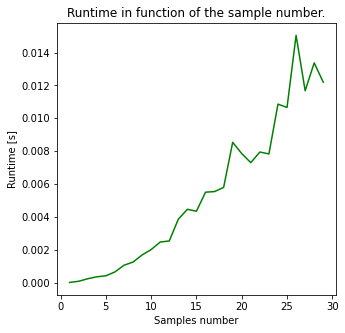

In [136]:
plotruntimeNfixed(SSS, n=10, k=30, trials=4)

We can observe that whenever plotting the runtime when the number of samples is increasing, the curve is quadratic.

In [121]:
def plotruntimekfixed(f,n, k, trials, figsize = [5,5]):
    """
    The function plots de runtime for the folding function.
    ::param:: f is the function used in the statement of the timeit function.
    ::param:: x is the desired parameter to check (samplelen, samples number, originalstring len). 
    ::param:: maxvalue is the maximum desired value to test (e.g., sample length, original string length, number of samples)
    ::param:: trials is the number of time the function will be called for a parameter value. The value will be averaged.
    ::figsize:: figsize is desired plot size.
    """
    
    times=[]
    originalstring_length=[]
    samples_number = []
           
    S="".join(random.choice("atgc") for i in range(40))
        
    for i in range(1, n):
        T = [randSubstring(S, n) for i in range(k)]
        time = timeit.timeit(stmt= lambda:f(T), number=trials)/trials
        times.append(time)
        samples_number.append(i)
    

    fig,ax = plt.subplots(figsize= figsize)
    ax.set_ylabel("Runtime [s]")
    ax.plot(samples_number, times, 'g')
    ax.set_xlabel("Samples length")
    plt.title('Runtime in function of the sample length.')

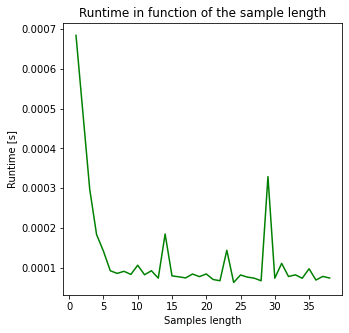

In [134]:
plotruntimekfixed(SSS, n=39, k=20, trials=20)

Here again, we can observe when the length of the sample is increasing(i.e., approaching the len of the orignal sequence), the runtime is decreasing. This shows that less computation is needed as we are approaching the real sequence length. Indeed, a subsequence of length x of an original string of len x, is the original string itself.

## Question 3: Random Substring

In [155]:
stringlen=10
samplelen=6
samples=10

S="".join(random.choice("atgc") for i in range(stringlen))
print("Original string: ",S)
print("")
T=[randSubstring(S,samplelen) for i in range(samples)]
print('substrings :', T)
print("")

best_superstring = SSS(T)
print("The shortest common superstring:", best_superstring)
print("Shortest common superstring length: ", len(best_superstring))



Original string:  gcgacatagt

substrings : ['gcatat', 'gcaagt', 'cgacag', 'gcgaat', 'gactgt', 'cgactg', 'ggactg', 'cgaaat', 'cgacta', 'ggacat']

The shortest common superstring: gcgaactagt
Shortest common superstring length:  10


## Question 4

<b> Is the length of the shortest common superstring of k strings of length n always k(n−s)+s,
where s is the length of longest common substring of these k strings? Argue why this is true
or provide a counterexample</b>

I found this assumption as false, as I found a counterexample: 

Strings = ['ATG', 'TGC', 'CGA']

k = 3  
n = 3  
s = 2  

shortest_superstring = 'CGATGC'   
length = 6   
formula = 3*(3-2)+2 = 5

Here, I provided a counterexample to the formula.